In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9313303284385456069, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 10642762738644213557
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 4122145752178937402
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11146722048
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4146251894795410094
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!pip install -q keras

In [5]:
!unzip -uq "/content/drive/My Drive/Colab Notebooks/traincopy.zip" -d "/content/drive/My Drive/Colab Notebooks/catsdogs/"

In [6]:
train_path = '/content/drive/My Drive/Colab Notebooks/catsdogs/train copy/train'
test_path = '/content/drive/My Drive/Colab Notebooks/catsdogs/train copy/test'

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import preprocess_input
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
train = train_datagen.flow_from_directory(train_path,target_size=(224, 224),color_mode='rgb',classes=['cat','dog'],class_mode='binary',batch_size=32)
test = test_datagen.flow_from_directory(test_path,target_size=(224, 224),color_mode='rgb',classes=['cat','dog'],class_mode='binary',batch_size=32)

Found 22500 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.


In [66]:
from tensorflow.keras.applications.mobilenet import MobileNet
mobilenet_model = MobileNet()
mobilenet_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [67]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense


x = mobilenet_model.layers[-6].output
predictions = Dense(1,activation = 'sigmoid')(x)
model = Model(inputs=mobilenet_model.input, outputs=predictions)

In [68]:
model.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)    

In [69]:
for layer in model.layers[:-5]:
    layer.trainable = False
    

In [70]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [71]:
train_steps=train.n//train.batch_size
validation_steps=test.n//test.batch_size
history = model.fit(train,steps_per_epoch=train_steps,validation_data=test,validation_steps=validation_steps,epochs=5)


Epoch 1/5
703/703 [==============================] - 171s 243ms/step - loss: 0.0602 - accuracy: 0.9788 - val_loss: 0.0392 - val_accuracy: 0.9872
Epoch 2/5
703/703 [==============================] - 166s 236ms/step - loss: 0.0311 - accuracy: 0.9886 - val_loss: 0.0495 - val_accuracy: 0.9808
Epoch 3/5
703/703 [==============================] - 169s 240ms/step - loss: 0.0172 - accuracy: 0.9942 - val_loss: 0.0427 - val_accuracy: 0.9856
Epoch 4/5
703/703 [==============================] - 167s 237ms/step - loss: 0.0108 - accuracy: 0.9964 - val_loss: 0.0369 - val_accuracy: 0.9872
Epoch 5/5
703/703 [==============================] - 168s 239ms/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.0434 - val_accuracy: 0.9864


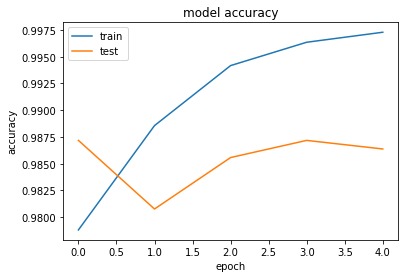

In [72]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()